In [29]:
 %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)

ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
city_ride_df = pd.merge(city_df, ride_df, on="city") 
city_ride_df.head()

# Display the data table for preview


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2018 8:40,13.93,5.628545e+12
1,Richardfort,38,Urban,2/13/2018 12:46,14.00,9.100501e+11
2,Richardfort,38,Urban,2/16/2018 13:52,17.92,8.206391e+11
3,Richardfort,38,Urban,2/1/2018 20:18,10.26,9.554936e+12
4,Richardfort,38,Urban,4/17/2018 2:26,23.00,7.200207e+11


In [ ]:
cities = city_ride_df['city'].unique()


In [5]:
# city_ride_df_orig = city_ride_df.copy()
urban_df= city_ride_df.loc[city_ride_df['type'] == 'Urban'] 


In [6]:
suburban_df= city_ride_df.loc[city_ride_df['type'] == 'Suburban'] 


In [40]:
rural_df= city_ride_df.loc[city_ride_df['type'] == 'Rural']


## Bubble Plot of Ride Sharing Data

In [9]:
rides_per_subcity = suburban_df.groupby(['city']).count()['ride_id']
avg_subfare_df = suburban_df.groupby(['city'])['fare'].mean()
subdrivers = suburban_df.groupby(['city'])['driver_count'].value_counts()
subdrivers.sum()


625

In [10]:
rides_per_ruralcity= rural_df.groupby(['city']).count()['ride_id']
avg_ruralfare_df = rural_df.groupby(['city'])['fare'].mean()
rural_drivers = rural_df.groupby(['city'])['driver_count'].value_counts()

In [11]:
rides_per_urbancity= urban_df.groupby(['city']).count()['ride_id']
avg_urbanfare_df = urban_df.groupby(['city'])['fare'].mean()
urban_drivers = urban_df.groupby(['city'])['driver_count'].value_counts()

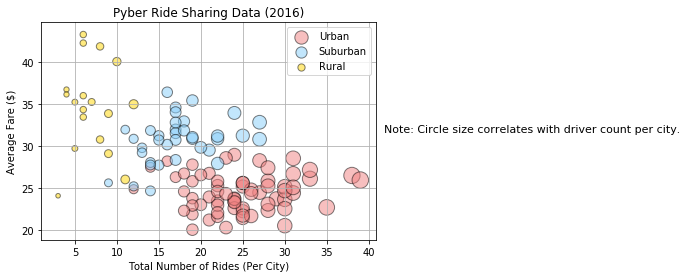

In [36]:
plt.scatter(rides_per_urbancity, avg_urbanfare_df, s=urban_drivers*7, marker='o', facecolors="lightcoral", edgecolor="black", 
            alpha=0.5, label="Urban")
plt.scatter(rides_per_subcity, avg_subfare_df, s=subdrivers*7, marker='o', facecolors="lightskyblue", edgecolor="black", 
            alpha=0.5, label="Suburban")
plt.scatter(rides_per_ruralcity, avg_ruralfare_df, s=rural_drivers*7, marker='o', facecolors="gold", edgecolor="black",
            alpha=0.5, label="Rural")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(['Urban', 'Suburban', 'Rural'], loc="best")
textstr = "Note: Circle size correlates with driver count per city."
plt.gcf().text(0.92, 0.5, textstr, fontsize=11)
plt.grid()
# Show plot
plt.show()

In [41]:
# Save Figure
plt.savefig("Pyber Ride Sharing Data (2016)")

<Figure size 432x288 with 0 Axes>

In [ ]:
## Total Fares by City Type

In [139]:
# Calculate Type Percents

total_fare = city_ride_df['fare'].sum()
total_fare

total_subfare_df = suburban_df['fare'].sum()
total_subfare_df

percentage_subfare = total_subfare_df / total_fare *100
percentage_subfare


30.46387206273222

In [140]:
total_ruralfare_df = rural_df['fare'].sum()
total_ruralfare_df

percentage_ruralfare = total_ruralfare_df / total_fare *100
percentage_ruralfare

6.81149297498341

In [141]:
total_urbanfare_df = urban_df['fare'].sum()
total_urbanfare_df

percentage_urbanfare = total_urbanfare_df / total_fare *100
percentage_urbanfare

62.72463496228438

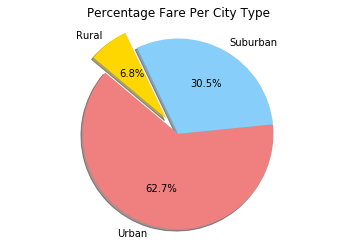

In [283]:
labels = ["Urban", "Suburban", "Rural"]
sizes = [62.7, 30.5, 6.8]
colors = ["lightcoral", "lightskyblue", "gold"]
explode= (0,0,0.2)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Percentage Fare Per City Type")
# Save Figure
plt.savefig("percentage fare per city type")

In [153]:
# Show Figure
plt.show()

## Total Rides by City Type

In [158]:
# Calculate Ride Percents
total_rides = city_ride_df['ride_id'].count()
total_rides

total_subrides_df = suburban_df['ride_id'].count()
total_subrides_df

percentage_subrides = total_subrides_df / total_rides *100


26.31578947368421

In [10]:
# Show Figure
plt.show()

In [159]:
total_ruralrides_df = rural_df['ride_id'].count()
total_ruralrides_df

percentage_ruralrides = total_ruralrides_df / total_rides *100
percentage_ruralrides

5.263157894736842

In [318]:
total_urbanrides_df = urban_df['ride_id'].count()
total_urbanrides_df
percentage_urbanrides = total_urbanrides_df / total_rides *100
percentage_urbanrides

68.42105263157895

Text(0.5,1,'Percentage Rides Per City Type')

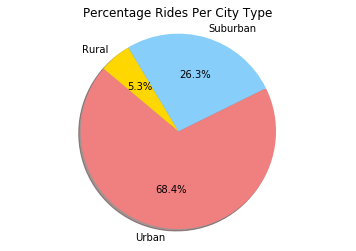

In [164]:
labels = ["Urban", "Suburban", "Rural"]
sizes = [68.4, 26.3, 5.3]
colors = ["lightcoral", "lightskyblue", "gold"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Percentage Rides Per City Type")
# Save Figure
plt.savefig("percentage rides per city type")

## Total Drivers by City Type

In [297]:
total_drivers = city_ride_df['driver_count'].count()
total_drivers

2375

In [316]:
# Calculate Driver Percents
subdrivers = suburban_df.groupby(['city'])['driver_count'].value_counts()
subdrivers.sum()

percentage_subdrivers = subdrivers.sum()/ total_drivers *100
percentage_subdrivers

26.31578947368421

In [317]:
rural_drivers = rural_df.groupby(['city'])['driver_count'].value_counts()
rural_drivers.sum()
percentage_ruraldrivers = rural_drivers.sum() / total_drivers *100
percentage_ruraldrivers

5.263157894736842

In [319]:
urban_drivers = urban_df.groupby(['city'])['driver_count'].value_counts()
urban_drivers.sum()

percentage_urbandrivers = urban_drivers.sum() / total_drivers *100
percentage_urbandrivers

68.42105263157895

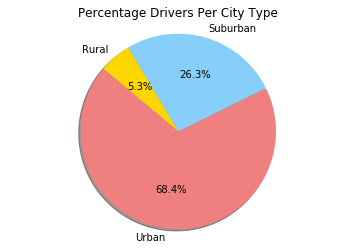

In [338]:
labels = ["Urban", "Suburban", "Rural"]
sizes = [68.4, 26.3, 5.3]
colors = ["lightcoral", "lightskyblue", "gold"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Percentage Drivers Per City Type")
# Save Figure
plt.savefig("percentage drivers per city type")

Observable Trends:
1. Urban cities are the biggest users of ride sharing services.
2. Average fares are higher in rural cities.
3. In this data set, only 15% of the cities are designated as rural. 55% of the cities are urban; 30% are suburban.